In [1]:
# -----------------------------------------------------------------------------------------------------
# Inception V4 model to build shared CNN layer
# Original: .py file [Here is just a presentation]
# Reference:
#    [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567)
#    & inception_v4 in keras
# Note: 
#    the input image format for this model is different from
#    the VGG16 and ResNet models (299x299 instead of 224x224),
#    and that the input preprocessing function is also different (same as Xception).
# ------------------------------------------------------------------------------------------------------

### Import Library

In [2]:
import numpy as np
import warnings
from keras.layers.convolutional import MaxPooling2D, Convolution2D, AveragePooling2D
from keras.layers import Input, Dropout, Dense, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras import regularizers
from keras import initializers
from keras.models import Model
from keras import backend as K
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file

Using TensorFlow backend.


In [3]:
###### From reference ######

In [4]:
def preprocess_input(x):
    x = np.divide(x, 255.0)
    x = np.subtract(x, 0.5)
    x = np.multiply(x, 2.0)
    return x

In [5]:
"""
Inception blocks 
&
Reduction blocks
"""
def block_inception_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 96, 1, 1)

    branch_1 = conv2d_bn(input, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3)

    branch_2 = conv2d_bn(input, 64, 1, 1)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 96, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x


def block_reduction_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 384, 3, 3, strides=(2,2), padding='valid')

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 3, 3)
    branch_1 = conv2d_bn(branch_1, 256, 3, 3, strides=(2,2), padding='valid')

    branch_2 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(input)

    x = concatenate([branch_0, branch_1, branch_2], axis=channel_axis)
    return x




def block_inception_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 384, 1, 1)

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 1, 7)
    branch_1 = conv2d_bn(branch_1, 256, 7, 1)

    branch_2 = conv2d_bn(input, 192, 1, 1)
    branch_2 = conv2d_bn(branch_2, 192, 7, 1)
    branch_2 = conv2d_bn(branch_2, 224, 1, 7)
    branch_2 = conv2d_bn(branch_2, 224, 7, 1)
    branch_2 = conv2d_bn(branch_2, 256, 1, 7)

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 128, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x

def block_reduction_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 192, 1, 1)
    branch_0 = conv2d_bn(branch_0, 192, 3, 3, strides=(2, 2), padding='valid')

    branch_1 = conv2d_bn(input, 256, 1, 1)
    branch_1 = conv2d_bn(branch_1, 256, 1, 7)
    branch_1 = conv2d_bn(branch_1, 320, 7, 1)
    branch_1 = conv2d_bn(branch_1, 320, 3, 3, strides=(2,2), padding='valid')

    branch_2 = MaxPooling2D((3, 3), strides=(2, 2), padding='valid')(input)

    x = concatenate([branch_0, branch_1, branch_2], axis=channel_axis)
    return x


def block_inception_c(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

    branch_0 = conv2d_bn(input, 256, 1, 1)

    branch_1 = conv2d_bn(input, 384, 1, 1)
    branch_10 = conv2d_bn(branch_1, 256, 1, 3)
    branch_11 = conv2d_bn(branch_1, 256, 3, 1)
    branch_1 = concatenate([branch_10, branch_11], axis=channel_axis)


    branch_2 = conv2d_bn(input, 384, 1, 1)
    branch_2 = conv2d_bn(branch_2, 448, 3, 1)
    branch_2 = conv2d_bn(branch_2, 512, 1, 3)
    branch_20 = conv2d_bn(branch_2, 256, 1, 3)
    branch_21 = conv2d_bn(branch_2, 256, 3, 1)
    branch_2 = concatenate([branch_20, branch_21], axis=channel_axis)

    branch_3 = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 256, 1, 1)

    x = concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    return x

In [6]:
###### reference part over #######

### shared CNN: VGG16

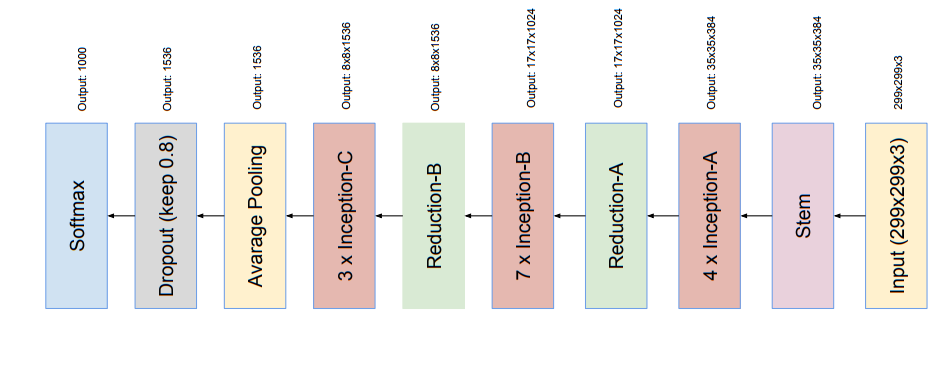

In [7]:
####### Visulization ########
from PIL import Image
Image.open('/Users/zehaodong/Desktop/AML_Final/keras-frcnn-master/inception_v4.png')

In [8]:
def nn_base(input,trainable=False):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1
    """We mostly focus on the dimension of the last tensor"""
    ###### Stern ######
    # Input Shape is 299 x 299 x 3 (th) or 3 x 299 x 299 (th)
    net = conv2d_bn(input, 32, 3, 3, strides=(2,2), padding='valid')  
    net = conv2d_bn(net, 32, 3, 3, padding='valid')                   
    net = conv2d_bn(net, 64, 3, 3)                                    

    branch_0 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)  
    branch_1 = conv2d_bn(net, 96, 3, 3, strides=(2,2), padding='valid')  
    net = concatenate([branch_0, branch_1], axis=channel_axis)

    branch_0 = conv2d_bn(net, 64, 1, 1)                             
    branch_0 = conv2d_bn(branch_0, 96, 3, 3, padding='valid')        
    branch_1 = conv2d_bn(net, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 64, 1, 7)
    branch_1 = conv2d_bn(branch_1, 64, 7, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3, padding='valid')
    net = concatenate([branch_0, branch_1], axis=channel_axis)       

    branch_0 = conv2d_bn(net, 192, 3, 3, strides=(2,2), padding='valid')  #l7
    branch_1 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)  #l8
    net = concatenate([branch_0, branch_1], axis=channel_axis)

    # 35 x 35 x 384
    ###### 4 x Inception-A blocks #####
    for idx in range(4):
        net = block_inception_a(net)
    # 35 x 35 x 384
    ###### Reduction-A block #####
    net = block_reduction_a(net)

    # 17 x 17 x 1024
    #####7 x Inception-B blocks #####
    for idx in range(6):
        net = block_inception_b(net)
    net = Conv2D(512,kernel_size=(1,1),strides=(1,1),padding="valid")(net)

    # -----------------------------------------------------------
    # NOTE: We choose to stop here, for 1024-dim is much familiar
    #       to us after we build structure of Resnet50 and VGG16
    # -----------------------------------------------------------
    
    """
    # 17 x 17 x 1024
    ###### Reduction-B block #####
    net = block_reduction_b(net)

    # 8 x 8 x 1536
    ###### 3 x Inception-C blocks #####
    for idx in range(3):
        net = block_inception_c(net)
    """
    
    return net

### Sturcture Functions

In [ ]:
"""
Funtions to build faster rcnn model in the training process 
and rebuild corresponding faster rcnn model in the test process
"""

In [11]:
from keras.models import Model
from keras.layers import Flatten, Dense, Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, TimeDistributed
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras_frcnn.RoiPoolingConv import RoiPoolingConv

In [12]:
def rpn(base_layers, num_anchors):
    """
    Used for testing
    inputs:
        base_layers: feature map, output from shared CNN (raw feature extraction net)
        num_anchors: in faster rcnn, equals to 3 x 3
    output: 
        x_cls: 9-d, used to build cls_loss, cross entropy
        x_regr: 4x9-d, used to build regr_loss, smooth L1
    """
    x = Conv2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)
    x_cls = Conv2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
    x_regr = Conv2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)
    return [x_cls, x_regr, base_layers]

In [13]:
def classifier(base_layers, input_rois, num_rois, nb_classes = 21, trainable=False):
    """
    Used in training process and test process
    Inputs:
        base_layers: feature map, output from shared CNN (raw feature extraction net)
        input_rois: roipooling layer
        num_rois: number of rois
    Outputs:
        out_cls: inputs for cross entropy loss
        out_regr: inputs for smooth L1 loss
    Why this structure:
        compared with inception_v3, v4 here provides less parameter, 
        so we used a more complex classifier
    """
    if K.backend() == 'tensorflow':
        pooling_regions = 7
        input_shape = (num_rois,7,7,512)
    elif K.backend() == 'theano':
        pooling_regions = 7
        input_shape = (num_rois,512,7,7)

    ##### Roipooling layer #####
    out_roi_pool = RoiPoolingConv(pooling_regions, num_rois)([base_layers, input_rois])

    ##### fully connected and relu layer + dropout layer #####
    out = TimeDistributed(Flatten(name='flatten'))(out_roi_pool)
    out = TimeDistributed(Dense(4096, activation='relu', name='fc1'))(out)
    out = TimeDistributed(Dropout(0.5))(out)
    out = TimeDistributed(Dense(4096, activation='relu', name='fc2'))(out)
    out = TimeDistributed(Dropout(0.5))(out)

    ##### output layer #####
    """no regression output for background, bg """
    out_cls = TimeDistributed(Dense(nb_classes, activation='softmax', kernel_initializer='zero'), name='dense_class_{}'.format(nb_classes))(out)
    out_regr = TimeDistributed(Dense(4 * (nb_classes-1), activation='linear', kernel_initializer='zero'), name='dense_regress_{}'.format(nb_classes))(out)

    return [out_cls, out_regr]

In [14]:
def get_weight_path():
    if K.image_dim_ordering() == 'th':
        print('pretrained weights not available for VGG with theano backend')
        return
    else:
        return 'inception_weights_tf_dim_ordering_tf_kernels.h5'

In [15]:
def get_img_output_length(width, height):
    """
    WHY: get_output_length like below
    based on the resnet:  strides = (2,2), padding='valid': 
                          then output_length = (input_length - filter_size + stride) // stride + 1 
    """
    def get_output_length(input_length):
        l1 = (input_length-3)//2+1
        l2 = (l1-3)+1
        l3 = (l2-3)//2+1
        l4 = (l3-3)+1
        l5= (l4-3)//2+1
        l6= (l5-3)//2+1
        return l6
    return get_output_length(width), get_output_length(height) 